In [1]:
# !pip install torchmetrics
from torchmetrics import WeightedMeanAbsolutePercentageError
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
df = pd.read_csv(r'C:\Users\asus rog\mts\dataa.csv')
df

,year,mouth,day,moskva_hran,severzapad_hran,ural_hran,moskva_pogruzka,moskva_razgruka,severzapad_pogruzka,severzapad_razgruka,ural_pogruzka,ural_razgruka
0,2018,1,1,4690.50,1647.911946,1611.92,0.00,0.00,0.00,0.00,0.00,0.00
1,2018,1,2,4690.50,1647.911946,1611.92,0.00,0.00,0.00,0.00,0.00,0.00
2,2018,1,3,4690.50,1647.911946,1611.92,0.00,0.00,0.00,0.00,0.00,0.00
3,2018,1,4,4690.50,1647.911946,1611.92,0.00,0.00,0.00,0.00,0.00,0.00
4,2018,1,5,4690.50,1647.911946,1611.92,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1722,2022,9,26,10483.07,7100.030000,4119.16,49.16,1.62,16.88,37.13,4.54,15.49
1723,2022,9,27,10448.14,7112.760000,4111.28,2.20,17.27,7.62,81.93,11.00,14.61
1724,2022,9,28,10494.83,7102.910000,4096.67,128.61,1.16,0.00,19.27,161.99,40.16
1725,2022,9,29,10687.78,6942.380000,4084.53,212.22,1.46,28.01,39.37,42.76,43.97


In [25]:
from datetime import date

print((df['year'][1]))

import pylab
import matplotlib.dates
xdata = []
for i in range(len(df['year'])):
    
    xdata.append(date (int(df['year'][i]),int(df['mouth'][i]), int(df['day'][i])))
xdata_float = matplotlib.dates.date2num(xdata)
print(type(df['moskva_pogruzka']))

2018
<class 'pandas.core.series.Series'>


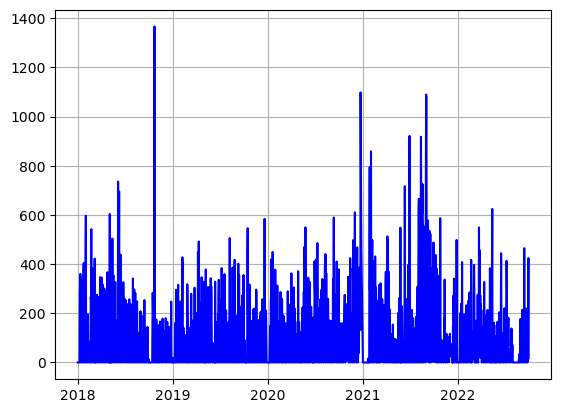

In [4]:

axes = pylab.subplot(1, 1, 1)
axes.xaxis.set_major_formatter (matplotlib.dates.DateFormatter("%Y"))
ydata = df['moskva_pogruzka'].values
pylab.plot_date (xdata_float, ydata, fmt="b-")

pylab.grid()
pylab.show()

In [5]:
# !pip install tensorflow
import torch. nn as nn
import torch.nn.functional as Fun
import tensorflow as tf
from tensorflow import keras

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df[{'year','mouth','day'}], df["moskva_razgruka"], train_size=0.7, shuffle=False) #, shuffle=False

C:\Users\asus rog\AppData\Local\Temp\ipykernel_14284\2231661835.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train, x_test, y_train, y_test = train_test_split(df[{'year','mouth','day'}], df["moskva_razgruka"], train_size=0.7, shuffle=False) #, shuffle=False


In [103]:

model =  tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(64,return_sequences=True, input_shape=(x_train.shape[1], 1 )))
model.add(tf.keras.layers.LSTM(20,return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.LSTM(20,return_sequences=True))
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.MSLE, optimizer='rmsprop')


In [104]:
model.fit(x_train, y_train, batch_size=32, epochs=1500, verbose="auto")

Epoch 1/1500
38/38 [==============================] - 3s 10ms/step - loss: 4.3018
Epoch 2/1500
38/38 [==============================] - 0s 10ms/step - loss: 3.5753
Epoch 3/1500
38/38 [==============================] - 0s 10ms/step - loss: 3.4910
Epoch 4/1500
38/38 [==============================] - 0s 11ms/step - loss: 3.4684
Epoch 5/1500
38/38 [==============================] - 0s 11ms/step - loss: 3.4632
Epoch 6/1500
38/38 [==============================] - 0s 11ms/step - loss: 3.4560
Epoch 7/1500
38/38 [==============================] - 0s 11ms/step - loss: 3.4532
Epoch 8/1500
38/38 [==============================] - 0s 10ms/step - loss: 3.4525
Epoch 9/1500
38/38 [==============================] - 0s 10ms/step - loss: 3.4567
Epoch 10/1500
38/38 [==============================] - 0s 10ms/step - loss: 3.4572
Epoch 11/1500
38/38 [==============================] - 0s 10ms/step - loss: 3.4561
Epoch 12/1500
38/38 [==============================] - 0s 10ms/step - loss: 3.4508
Epoch 13/1500

In [48]:
predic = model.predict(x_test)

17/17 [==============================] - 0s 3ms/step


In [105]:
model.save(r"C:\Users\asus rog\mts\razgruzka_msk.h5")
# print(type(xdata))
# print(x_test.shape)
# print(type(x_test))
# print(type(y_test))
# predic = predic.to_series()
# print(type(predic))

In [108]:
print(type(predic))
print(len(predic))

<class 'numpy.ndarray'>
519


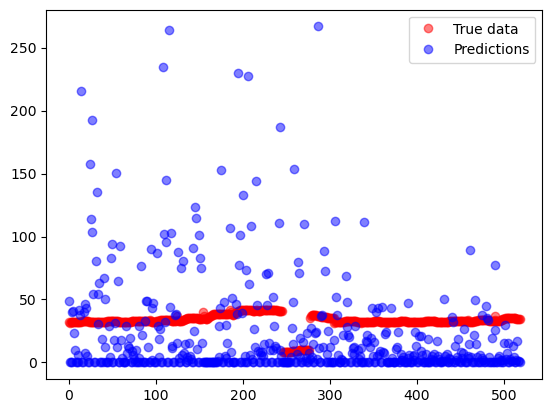

In [109]:
plt.clf()
x_test = np.array([i for i  in range(len(predic))])
plt.plot(x_test, predic, 'ro', label='True data', alpha=0.5)
# plt.plot(x_test, predicted, 'go', label='Predictions', alpha=0.5)
plt.plot(x_test, y_test, 'bo', label='Predictions', alpha=0.5)
# plt.plot(future, w_valid, 'go', label='futur', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [32]:
# print((predic.reshape(1, -1) - y_test.values.reshape(1, -1)))

In [38]:
xdata = []
print(x_test['year'].shape)
for i in range(len(x_test['year'])):
    xdata.append(date (int(x_test['year'].values[i]),int(x_test['mouth'].values[i]), int(x_test['day'].values[i])))
# xdata_float = matplotlib.dates.date2num(xdata)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [96]:
# axes = pylab.subplot(1, 1, 1)
# axes.xaxis.set_major_formatter (matplotlib.dates.DateFormatter("%M"))

In [31]:
# # predic =  predic.reshape(1, -1)
# # x_test = x_test.values.reshape(1, -1)
# print(predic.shape)
# print(x_test.shape)
# y_test = y_test.values.reshape(1, -1)
# # print(predic.shape)    #.data.numpy()
plt.clf()
plt.plot(xdata, predic, 'ro', label='True data', alpha=0.5)
# # plt.plot(x_test, predic, 'go', label='Predictions', alpha=0.5)
# plt.plot(x_test, y_test, 'bo', label='Predictions', alpha=0.5)
# # # # plt.plot(future, w_valid, 'go', label='futur', alpha=0.5)
# plt.legend(loc='best')
# plt.show()

In [86]:
# print(y_test.shape)
# print(predic.shape)
# print((y_test - predic).mean())
# # print((w - predicted).mean())